In [ ]:
## Week 2 ## 

In [1]:
import numpy as np
from numpy import mean

import pandas as pd
import scipy.io
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import load_wine
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_moons
from sklearn.manifold import SpectralEmbedding
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#### Question 1 

In [3]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"].astype(np.float64) #3 classes of flowers.

'''
Notes:
The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, 
returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after 
getting the hyperplane, you can then feed some features to your classifier to see what the 
"predicted" class is. This makes this specific algorithm rather suitable for our uses, though
you can use this for many situations.

C=Regularization parameter. The strength of the regularization is 
inversely proportional to C. Must be strictly positive.

loss=Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) 
while ‘squared_hinge’ is the square of the hinge loss. The combination of penalty='l1' and 
loss='hinge' is not supported.

'''

model = Pipeline([("scaler", StandardScaler()),("linear_svc", LinearSVC(C=10, loss="hinge", max_iter=20000)),])
model.fit(X, y)
scores_pipe = cross_validate(model, X, y)["test_score"]
print("training features:", scores_pipe)

training features: [0.96666667 1.         0.93333333 0.9        0.96666667]


In [4]:
#### Question 2

In [5]:
chd = datasets.fetch_california_housing()
X, y = chd["data"], chd["target"]

print("X shape: ", X.shape)
print("y shape: ", y.shape)
print("\n Data X")
print(X)
print("\n Target y:")
print(y)

X shape:  (20640, 8)
y shape:  (20640,)

 Data X
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]

 Target y:
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [6]:
# Create a pipeline that includes the Decision Tree Regressor, Random Forest Regressor, and Ensemble

def tree_pipe(X, y, max_depth, est):

    dt = DecisionTreeRegressor(max_depth=max_depth)
    dt_scores = cross_validate(dt, X, y)["test_score"]
    print("DT -----------", dt_scores)
    
    rf = RandomForestRegressor(n_estimators=est, max_depth=max_depth)
    rf_scores = cross_validate(rf, X, y)["test_score"]
    print("RF -----------", rf_scores)
    
    ensemble = VotingRegressor(estimators=[('rf', rf), ('dt', dt), ('r', Ridge(alpha=0.01))])
    ensemble_scores = cross_validate(ensemble, X, y)["test_score"]
    print("Ensemble -----", ensemble_scores)
    

tree_pipe(X, y, max_depth=3, est=10)

DT ----------- [0.4538519  0.43232135 0.51753817 0.30445633 0.53183194]
RF ----------- [0.49490551 0.48017604 0.55951152 0.32916733 0.56168872]
Ensemble ----- [0.57588775 0.49938818 0.59393484 0.44076564 0.64756129]


In [7]:
#### Question 3

In [9]:
wine = load_wine(as_frame=True)
X, y = wine['data'].values, wine['target'].values

#See features for 10 random wines
data = pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])
data.sample(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
86,12.16,1.61,2.31,22.8,90.0,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495.0,1.0
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1.0
41,13.41,3.84,2.12,18.8,90.0,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035.0,0.0
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0,2.0
44,13.05,1.77,2.10,17.0,107.0,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885.0,0.0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0,1.0
73,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0,1.0
120,11.45,2.40,2.42,20.0,96.0,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625.0,1.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0.0
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0,2.0


In [46]:
#See dimensions
print("X shape: " + str(X.shape))
print("y shape: " + str(y.shape))

#See features and labels for first 4 wines
for n in range(0, 4):
    print("Wine", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

X shape: (178, 13)
y shape: (178,)
Wine 1 
  Features: [14.23, 1.71, 2.43, 15.6, 127.0, 2.8, 3.06, 0.28, 2.29, 5.64, 1.04, 3.92, 1065.0] 
  Label: 0
Wine 2 
  Features: [13.2, 1.78, 2.14, 11.2, 100.0, 2.65, 2.76, 0.26, 1.28, 4.38, 1.05, 3.4, 1050.0] 
  Label: 0
Wine 3 
  Features: [13.16, 2.36, 2.67, 18.6, 101.0, 2.8, 3.24, 0.3, 2.81, 5.68, 1.03, 3.17, 1185.0] 
  Label: 0
Wine 4 
  Features: [14.37, 1.95, 2.5, 16.8, 113.0, 3.85, 3.49, 0.24, 2.18, 7.8, 0.86, 3.45, 1480.0] 
  Label: 0


Ideal: 0.993
> folds=2, accuracy=0.986 (0.972,1.000)
> folds=3, accuracy=0.993 (0.979,1.000)
> folds=4, accuracy=0.993 (0.972,1.000)
> folds=5, accuracy=0.986 (0.931,1.000)


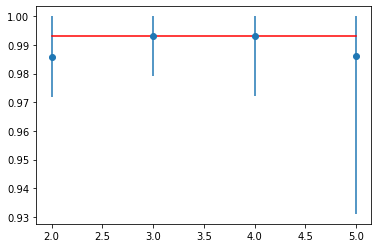

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

def get_dataset(n_samples=100):
    X, y = X_train, y_train
    return X, y

model = RandomForestClassifier()
 
def evaluate_model(cv, model):
    X, y = get_dataset()
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return np.mean(scores), scores.min(), scores.max()
 
ideal, _, _ = evaluate_model(LeaveOneOut(), model)
print('ideal test condition %.3f' % ideal)

folds = range(2,6)
means, mins, maxs = list(),list(),list()

for k in folds:
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    k_mean, k_min, k_max = evaluate_model(cv, model)
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    means.append(k_mean)
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
plt.plot(folds, [ideal for _ in range(len(folds))], color='r')
plt.show()

In [53]:
#Retreive Models for Kfold validation:
def get_models():
    models = []
    models.append(('LR',LogisticRegression()))
    models.append(('RC',RidgeClassifier()))
    models.append(('SVC',SVC()))
    models.append(('NB', GaussianNB()))
    models.append(('RC',RandomForestClassifier()))
    models.append(('ET',ExtraTreesClassifier()))
    return models

In [54]:
cv = KFold(n_splits=11, shuffle=True, random_state=1)
models = get_models()
names = []; cv_results = []

LR: 0.979021 (0.034259)
RC: 0.979021 (0.034259)
SVC: 0.979021 (0.034259)
NB: 0.972028 (0.037004)
RC: 0.986014 (0.029669)
ET: 0.986014 (0.044228)


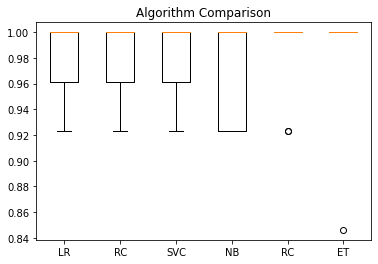

In [55]:
for name, model in models:
    results = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    cv_results.append(results)
    names.append(name)
    print('%s: %f (%f)' % (name, results.mean(), results.std()))
plt.boxplot(cv_results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [56]:
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
predictions = et.predict(X_test)

In [57]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9722222222222222
[[14  0  0]
 [ 1 12  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



In [64]:
#### Question 4

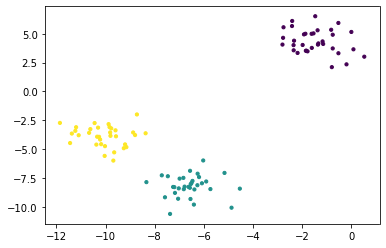

In [88]:
X, y = make_blobs(random_state=1)
X_2, y_2 = make_moons(n_samples=200, noise=.05, random_state=0)

#--------------------------------------------------------------------

k_three_clust = KMeans(n_clusters=3)
k_three_clust.fit(X)
labs = k_three_clust.labels_ 

plt.scatter(X[:, 0], X[:, 1], c=labs)
plt.show()

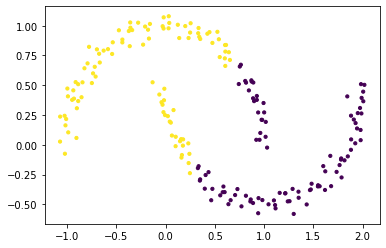

In [89]:
k_two_clust = KMeans(n_clusters=2)
k_two_clust.fit(X_2)
labs = k_two_clust.labels_ 

plt.scatter(X_2[:, 0], X_2[:, 1], c=labs)
plt.show()

In [ ]:
'''

K means performs better on the blobs than the moons. However, this result is expected based how the algorithm uses
centroids (centers) to define its clusters. K means will not be able to properly characterize complex shapes as it would 
more circular clusters.

'''

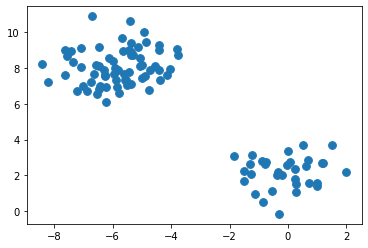

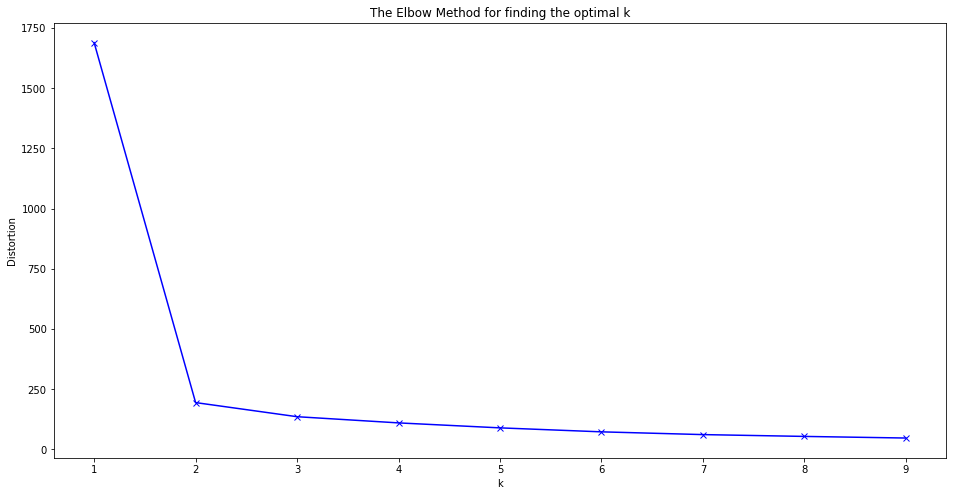

In [90]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_blobs(random_state=5)
plt.scatter(X[:, 0], X[:, 1], s=60)

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
#Plotting the distortions of K-Means
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method for finding the optimal k')
plt.show()

In [ ]:
#### Question 5

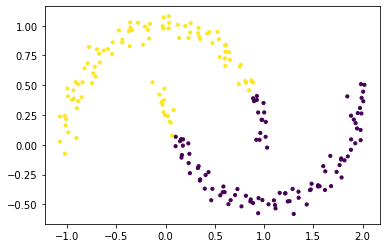

In [97]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=1)
labs = gmm.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labs)

'''
There are some slight improvements with these gmm parameters compared to K means but overall, there is still 
some mispecification occurring. 

'''

(200, 2)


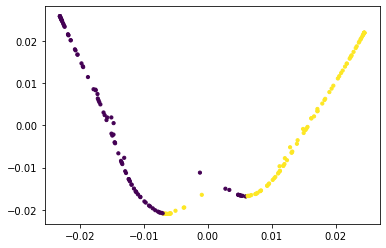

In [101]:
se = SpectralEmbedding(n_components=2)
se_fit = se.fit_transform(X)
print(se_fit.shape)

gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=1)
labs = gmm.fit(X).predict(X)
plt.scatter(se_fit[:, 0], se_fit[:, 1], c=labs)

'\nThe points here follow the same distributions as the moon plots in the previous examples.\n\n'

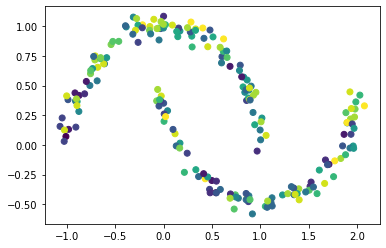

In [107]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

gmm = GaussianMixture(n_components=16, covariance_type='full')
gmm.fit(X)

X16, y16 = gmm.sample(n_samples=200)
labs = gmm.fit(X).predict(X)
plt.scatter(X16[:, 0], X16[:, 1], c=labs)

'''
The points here follow the same distributions as the moon plots in the previous examples.

'''

In [ ]:
#### Question 5

(116, 116)
(116, 2)


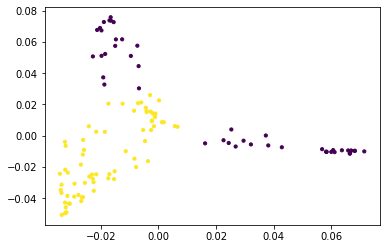

In [104]:
#Using AAL, it is anatomically defined, as opposed to functionally defined like most other atlases in the file.
mat = scipy.io.loadmat('/Users/jacobderosa/Desktop/GitHub/ABCD_Repronim/AI_ML/Week2/acq-64dir_space-T1w_desc-preproc_space-T1w_msmtconnectome.mat')

#obtain the streamline count weighted by both SIFT and inverse node volumes 
connectivity = mat["aal116_sift_invnodevol_radius2_count_connectivity"]

con = np.asarray(connectivity)
print(con.shape)

se = SpectralEmbedding(n_components=2)
se_fit = se.fit_transform(con)
print(se_fit.shape)

gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
labs = gmm.fit(se_fit).predict(se_fit)
plt.scatter(se_fit[:, 0], se_fit[:, 1], c=labs, s=10)